In [4]:
# Analyse de données
import pandas as pd
import numpy as np
from datetime import datetime
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
# Standardisation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
# Découpage du dataset
from sklearn.model_selection import train_test_split
# Modélisation
from sklearn.linear_model import LinearRegression
# métriques
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [5]:
df = pd.read_csv('raw_data/carData.csv')

## Nettoyage et préparation des données

In [6]:
# Ajout de la variable âge : Car_Age
current_year = datetime.now().year
df['Car_Age'] = current_year - df['Year']

# Stratification de 'Selling_Price' en 'Price_Category'
df['Price_Category'] = np.ceil(df['Selling_Price'] /1.5)
df['Price_Category'] = df['Price_Category'].where(df['Price_Category'] <5, 5.0)

# Standardisation de : Present_Price, Kms_Driven
scaler = StandardScaler()
df[['Present_Price_Std', 'Kms_Std']] = scaler.fit_transform(df[['Present_Price', 'Kms_Driven']])

# Conversion des variables qualitatives en variables quantitatives
df["Fuel_Type_numeric"] = df["Fuel_Type"].map({"Petrol": 1, "Diesel": 2, "CNG": 3})
df["Seller_Type_numeric"] = df["Seller_Type"].map({"Dealer": 1, "Individual": 2})
df["Transmission_numeric"] = df["Transmission"].map({"Manual": 0, "Automatic": 1})

# DataFrame filtré BRUT
df_filtered = df[['Car_Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', "Fuel_Type_numeric", "Seller_Type_numeric", "Transmission_numeric"]]
# DataFrame filtré STANDARDISE
df_standardized = df[['Car_Age', 'Selling_Price', 'Present_Price_Std', 'Kms_Std', 'Owner', "Fuel_Type_numeric", "Seller_Type_numeric", "Transmission_numeric"]]

## Selection de la variable à expliquer

In [7]:
# Target
y = df_filtered["Selling_Price"]
y_std = df_standardized["Selling_Price"] 

## Selection de la variable explicative

In [8]:
# Car-Age
X = df_filtered[['Car_Age']]

## Division du dataset : jeu d'entrainement, jeu de test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Entrainement du modèle

In [10]:
# Modèle
lin_reg = LinearRegression()

# Entrainement
lin_reg.fit(X_train, y_train)

LinearRegression()

## Prédiction

In [ ]:
# Prédictions BRUT
y_pred = lin_reg.predict(X_test)

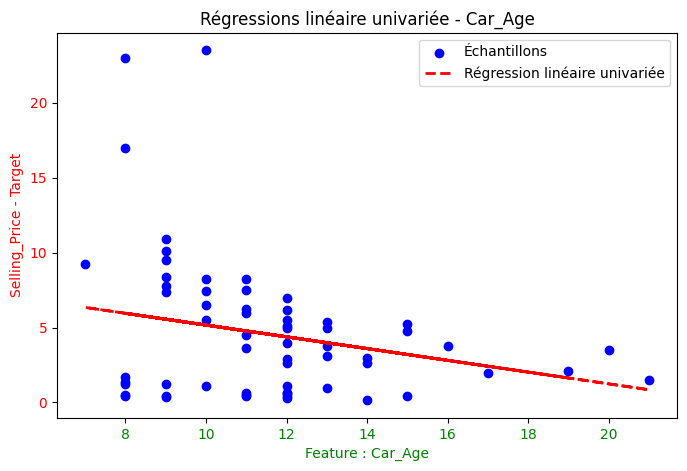

In [13]:
plt.figure(figsize=(8, 5))

# Jeu de test
plt.scatter(X_test, y_test, color='blue', label="Échantillons")

# Droite de régression BRUT
plt.plot(X_test, y_pred, '--', color='red', linewidth=2, label="Régression linéaire univariée")

# Labels et titre
plt.xlabel("Feature : Car_Age", color="green")
plt.xticks(color="green")
plt.ylabel("Selling_Price - Target", color="red")
plt.yticks(color="red")
plt.title("Régressions linéaire univariée - Car_Age")
plt.legend()


## Métriques

In [18]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print(f"MAE:  {mae}\nMSE: {mse}\nRMSE: {rmse}")


MAE:  3.2033147911945434
MSE: 20.999654046415056
RMSE: 4.582537948169667
